In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt
import seaborn as sns
import re

DATA AVAILABILITY:

In [8]:
customer=pd.read_csv("Customer.csv")
transaction=pd.read_csv("Transactions.csv")
prod_cat=pd.read_csv("prod_cat_info.csv")

In [9]:
prod_cat=prod_cat.rename(columns={"prod_sub_cat_code":"prod_subcat_code"})

In [10]:
customer.info()
transaction.info()
prod_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64

1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
keep all customers who have done transactions with us and select the join type accordingly

In [12]:
prod_concat = pd.merge(left=transaction, right=prod_cat,on=["prod_cat_code","prod_subcat_code"],how="left")
customer_final=pd.merge(left=prod_concat, right=customer,right_on="customer_Id", left_on="cust_id", how="left")
customer_final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,22-05-1970,M,2.0


2. Prepare a summary report for the merged data set

a. Get the column names and their corresponding data types


In [15]:
customer_final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
dtype: object

 b. Top/Bottom 10 observations

In [17]:
print("Top 10 Observation:")
customer_final.head(10)

Top 10 Observation:


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
5,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,272357,09-10-1982,F,6.0
6,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,273667,29-05-1981,M,9.0
7,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,271489,21-04-1971,M,9.0
8,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,275108,04-11-1971,F,8.0
9,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,269014,27-11-1979,F,3.0


In [18]:
print("Bottom 10 Observation:")
customer_final.tail(10)

Bottom 10 Observation:


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,25-01-2011,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,271982,10-08-1976,M,8.0
23044,14787475597,273982,25-01-2011,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,273982,12-10-1991,M,4.0
23045,50691119572,273031,25-01-2011,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,273031,17-01-1980,F,8.0
23046,40893803228,272049,25-01-2011,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,272049,28-06-1975,F,6.0
23047,30856003613,266866,25-01-2011,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,266866,18-04-1974,M,4.0
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,22-05-1970,M,2.0
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,15-01-1982,M,1.0


 c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [20]:
continous_variable=customer_final.loc[:,['prod_subcat_code','prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt']]
continous_variable.describe()

,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
count,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000
mean,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002
std,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264
min,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000
25%,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000
50%,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000
75%,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000
max,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000


d. Frequency tables for all the categorical variables

In [22]:
categorical_variable=customer_final.select_dtypes(include=["object"])
categorical_variable.describe()

,tran_date,Store_type,prod_cat,prod_subcat,DOB,Gender
count,23053,23053,23053,23053,23053,23044
unique,1129,4,6,18,3987,2
top,13-07-2011,e-Shop,Books,Women,27-12-1988,M
freq,35,9311,6069,3048,32,11811


3. Generate histograms for all continuous variables and frequency bars for categorical variables

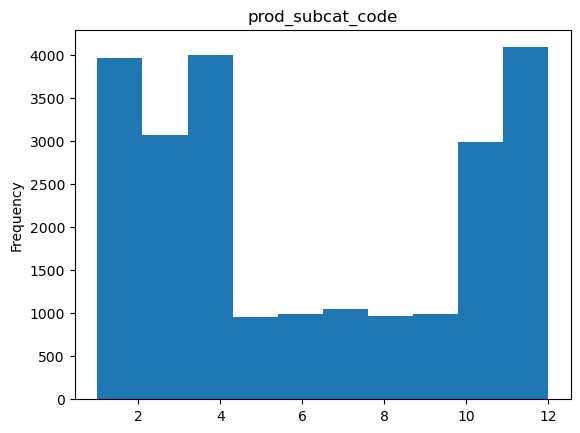

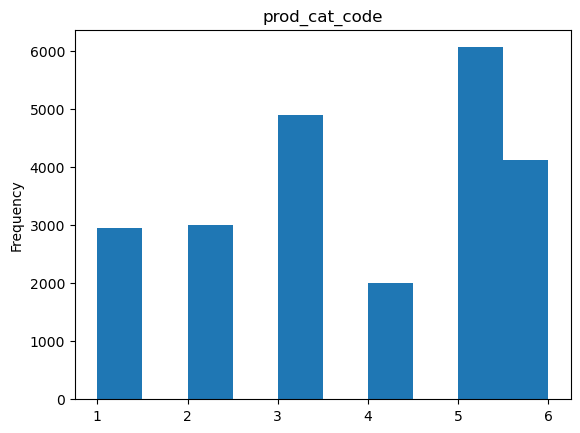

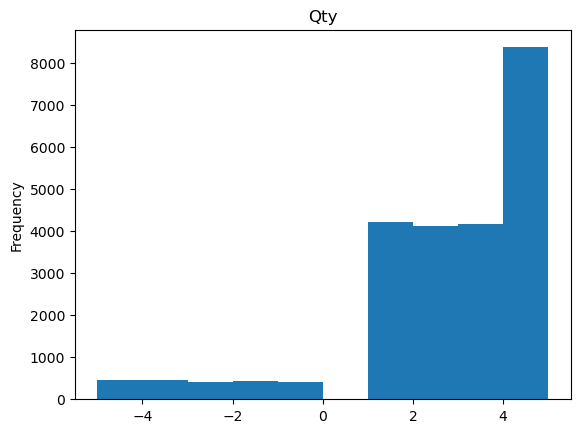

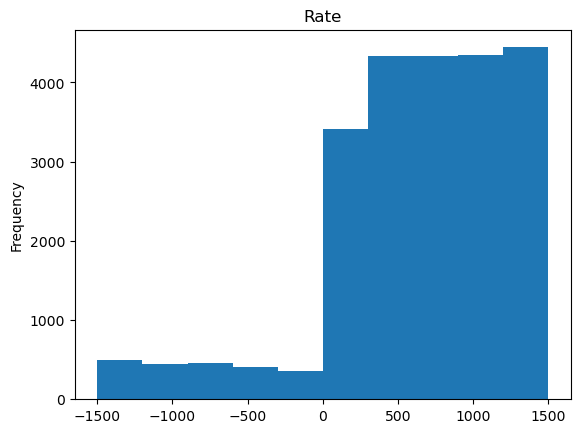

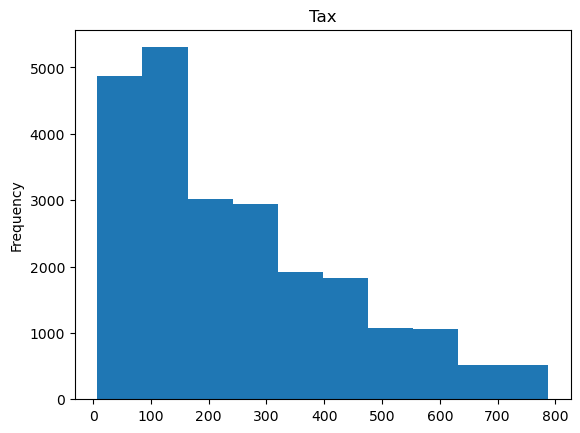

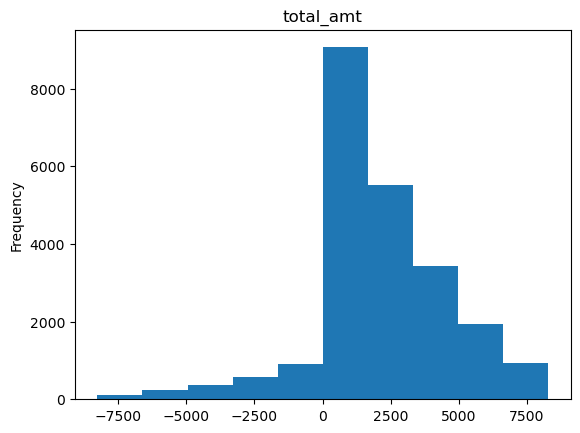

In [24]:
for var in continous_variable.columns:
    continous_variable[var].plot(kind='hist')
    plt.title(var)
    plt.show()


4. Calculate the following information using the merged dataset :

a. Time period of the available transaction data

In [27]:
max_tran_date = customer_final["tran_date"].max()
min_tran_date = customer_final["tran_date"].min()


max_tran_date_str = pd.Timestamp(max_tran_date).strftime("%d-%m-%Y")
min_tran_date_str = pd.Timestamp(min_tran_date).strftime("%d-%m-%Y")


print("Time period of the available transaction data:", min_tran_date_str + " - " + max_tran_date_str)

Time period of the available transaction data: 01-01-2012 - 09-09-2013


 b. Count of transactions where the total amount of transaction was negative

In [29]:
customer_final[customer_final["Qty"]<0]["transaction_id"].count()

2177

5. Analyze which product categories are more popular among females vs male customers

In [31]:
prod_by_gender=customer_final.groupby(["Gender","prod_cat"])["Qty"].sum().reset_index()
prod_by_gender.sort_values(by="Qty",ascending=False).reset_index(drop="index").T


,0,1,2,3,4,5,6,7,8,9,10,11
Gender,M,F,M,F,M,F,M,F,M,F,F,M
prod_cat,Books,Books,Electronics,Electronics,Home and kitchen,Home and kitchen,Clothing,Footwear,Footwear,Clothing,Bags,Bags
Qty,7587,7070,6476,5832,5041,4895,3748,3716,3555,3425,2362,2346


6. Which City code has the maximum customers and what was the percentage of customers from
that city?


In [62]:
# City code has the maximum customers
city_group=customer_final.groupby("city_code")["cust_id"].count().sort_values(ascending=False)

# percentage of customers from that city
percentage = round((city_group[4.0] / city_group.sum()) * 100,2)
print("City code has the maximum customers:")
print(city_group.head(1))
print("percentage of customers from that city:",percentage)

City code has the maximum customers:
city_code
4.0    2422
Name: cust_id, dtype: int64
percentage of customers from that city: 10.51


7. Which store type sells the maximum products by value and by quantity?

In [82]:
print(customer_final.groupby("Store_type")[["Qty","Rate"]].sum().sort_values(by="Rate",ascending=False))
print("e-Shop store type sells the maximum products by value and by quantity")

                  Qty     Rate
Store_type                    
e-Shop          22763  5941001
MBR             11194  2953253
Flagship store  11133  2941557
TeleShop        10984  2834420
e-Shop store type sells the maximum products by value and by quantity


8. What was the total amount earned from the "Electronics" and "Clothing" categories from
Flagship Stores?

In [120]:
filtered_data=customer_final[(customer_final["prod_cat"].isin(["Electronics","Clothing"]))
                                                          & (customer_final["Store_type"]=="Flagship store")]

print("total amount earned from the Electronics and Clothing categories from Flagship Stores")
print(filtered_data.groupby("prod_cat")["total_amt"].sum())

total amount earned from the Electronics and Clothing categories from Flagship Stores
prod_cat
Clothing       1194423.23
Electronics    2215136.04
Name: total_amt, dtype: float64


9. What was the total amount earned from "Male" customers under the "Electronics" category?


In [142]:
filter_data=customer_final[(customer_final["Gender"]=="M")&(customer_final["prod_cat"]=="Electronics")]
filter_data.groupby(["Gender","prod_cat"])["total_amt"].sum()

Gender  prod_cat   
M       Electronics    5703109.425
Name: total_amt, dtype: float64

10. How many customers have more than 10 unique transactions, after removing all transactions
which have any negative amounts?

In [187]:
positive_sales=customer_final[customer_final["Qty"]>0]
grouped_tran_id=positive_sales.groupby("cust_id")["transaction_id"].count().reset_index(name="transaction_count")

print("customers have more than 10 unique transactions, after removing all transactions which have any negative amounts:")
print(grouped_tran_id[grouped_tran_id["transaction_count"]>10].reset_index(drop="index"))

customers have more than 10 unique transactions, after removing all transactions which have any negative amounts:
   cust_id  transaction_count
0   266794                 11
1   270535                 11
2   270803                 11
3   272741                 11
4   273014                 11
5   274227                 11


11. For all customers aged between 25 - 35, find out:

a. What was the total amount spent for “Electronics” and “Books” product categories?

In [219]:
customer_final["DOB"] = pd.to_datetime(customer_final["DOB"], format="%d-%m-%Y")
customer_final["age"] = customer_final["DOB"].apply(lambda x: (datetime.now() - x).days // 365)

age_filtered_customers = customer_final[(customer_final["age"] >= 25) & (customer_final["age"] <= 35) &
                                                                      (customer_final["prod_cat"].isin (["Electronics","Books"]))]

transactions_count = age_filtered_customers.groupby("prod_cat")["total_amt"].sum().reset_index(name="total_amt")
print(transactions_count)

      prod_cat    total_amt
0        Books  2293010.915
1  Electronics  1936411.945


b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [242]:
customer_final['tran_date'] = pd.to_datetime(customer_final['tran_date'], format='%d-%m-%Y',dayfirst=True, errors='coerce')
customer_final["DOB"] = pd.to_datetime(customer_final["DOB"], format="%d-%m-%Y")

age_filtered_customers = customer_final[(customer_final["age"] >= 25) & (customer_final["age"] <= 35) ]
                                                       
total_amount = age_filtered_customers[(age_filtered_customers['tran_date'] >='2014-01-01') & 
                                            (age_filtered_customers['tran_date'] <='2014-03-01')]
print("the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014:",total_amount["total_amt"].sum())

the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014: 272814.555
